In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TensorNetwork import TensorNetwork as TN
from QFTMPO import QFTMPO
from prepare_network import *

# MPS Construction Runtime

In [2]:
N = (5, 10, 20, 50, 100, 1000)
times = []
for n in N:
    mps, t = prepare_mps(N=n)
    times.append(t)
    
print(times)

[0.055, 0.022, 0.036000000000000004, 0.107, 0.17200000000000001, 2.176]


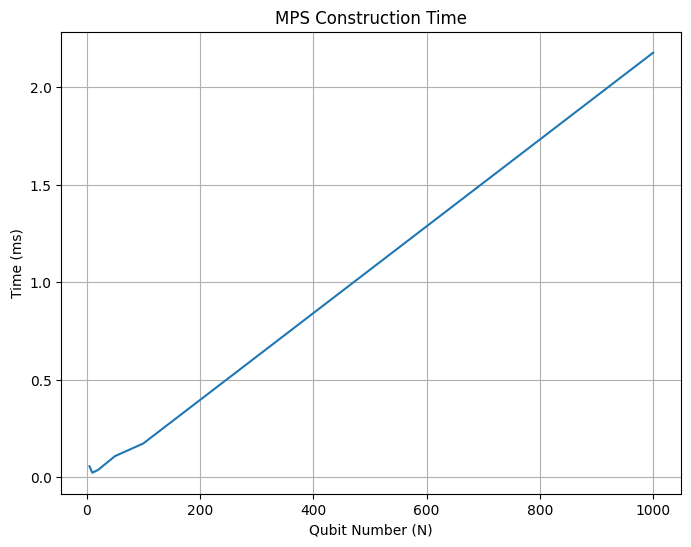

In [3]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("MPS Construction Time")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Time (ms)")

plt.plot(N, times)
plt.show()

# QFT-MPO Construction Runtime

### Unbounded bond dimensions:

In [4]:
N = (4, 6, 8, 10, 12, 14)
MPOs = []
times = []
for n in N:
    mpo, t = prepare_mpo(N=n, max_bond=None)
    MPOs.append(mpo)
    times.append(t)
    
print(times)

[2.669, 4.006, 45.464999999999996, 553.298, 7029.8910000000005, 83481.5]


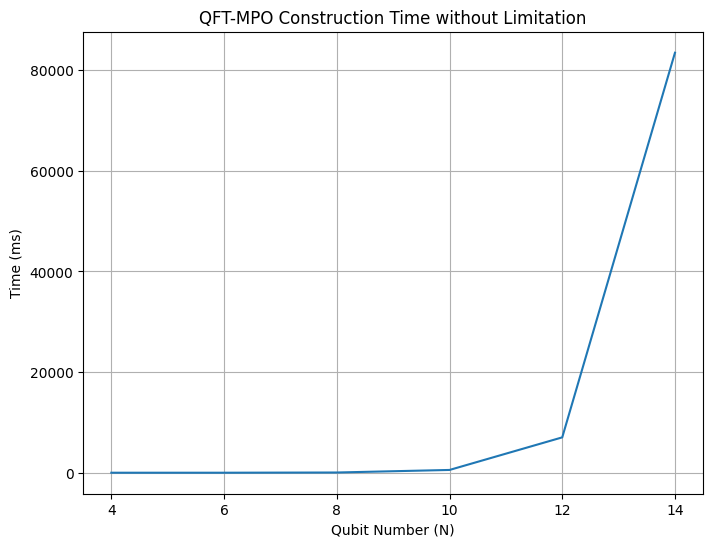

In [5]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO Construction Time without Limitation")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Time (ms)")

plt.plot(N, times)
plt.show()

[4, 16, 32, 64, 256, 512]


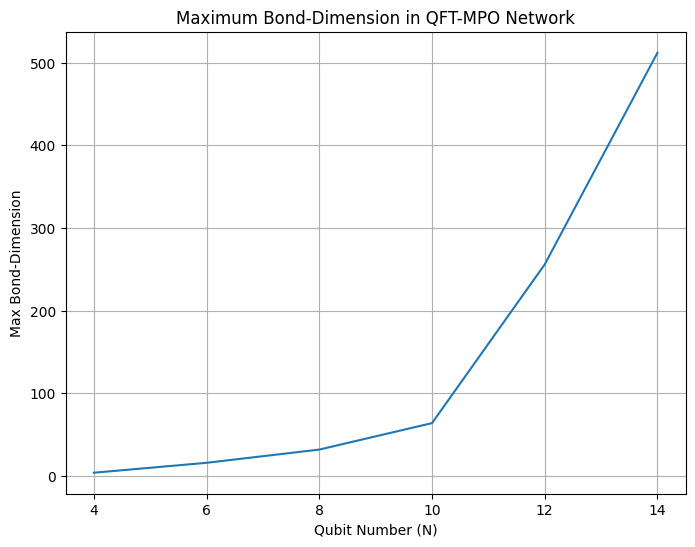

In [6]:
max_dims = [max(mpo.get_bond_dims()) for mpo in MPOs]
print(max_dims)

plt.figure(figsize=(8, 6))
plt.grid()

plt.title("Maximum Bond-Dimension in QFT-MPO Network")
plt.xlabel("Qubit Number (N)")
plt.ylabel("Max Bond-Dimension")

plt.plot(N, max_dims)
plt.show()

### Bounded bond dimensions

In [7]:
N = (4, 8, 16, 32, 64, 128)
max_bond = (8, 16, 64, 128, 256, 512, 2048, 2048*8)

times_N = []
for n in N:
    times = []
    for bond in max_bond:
        _, t = prepare_mpo(N=n, max_bond=bond)
        times.append(t)
    times_N.append(times)
    print(f"N={n}: {times}")

N=4: [1.206, 1.018, 0.6859999999999999, 0.245, 0.221, 0.216, 0.20900000000000002, 0.208]
N=8: [2.731, 1.5299999999999998, 1.495, 2.854, 1.629, 1.494, 1.462, 1.46]
N=16: [10.246, 13.417, 7.425, 14.964, 9.318999999999999, 7.805999999999999, 7.465, 7.4079999999999995]
N=32: [46.089, 37.255, 33.982, 72.899, 68.553, 39.984, 34.461, 33.31]
N=64: [135.92399999999998, 132.522, 131.055, 131.86999999999998, 130.39700000000002, 130.706, 131.06, 130.645]
N=128: [539.271, 536.0279999999999, 549.932, 547.676, 546.288, 547.158, 550.566, 537.76]


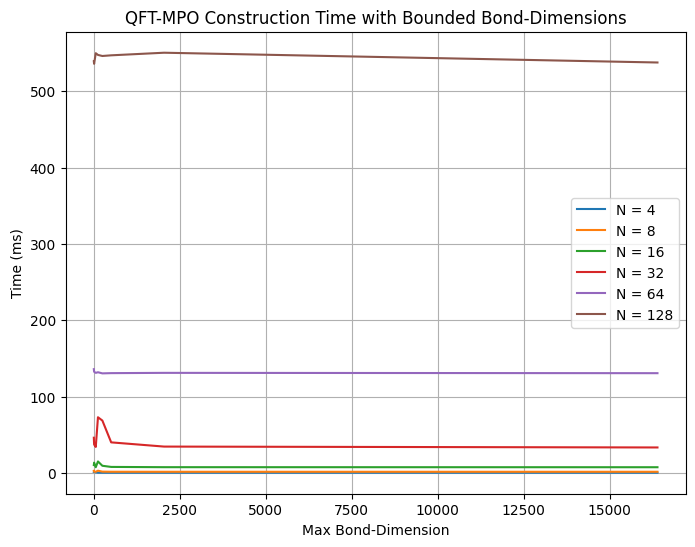

In [8]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.title("QFT-MPO Construction Time with Bounded Bond-Dimensions")
plt.xlabel("Max Bond-Dimension")
plt.ylabel("Time (ms)")

for i, lst in enumerate(times_N):
    plt.plot(max_bond, lst, label=f"N = {N[i]}")

plt.legend()
plt.show()